In [1]:
import numpy as np
from scipy import linalg
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import math
from scipy import integrate
from numpy.linalg import inv
import functools
from random import gauss
from math import sqrt

# **PART 1 - Q2**


In [56]:
def MLE1(X, y):
    X_t = X.transpose()
    return np.inv(X_t*X)*X_t*y

#**PART 1 - Q5**

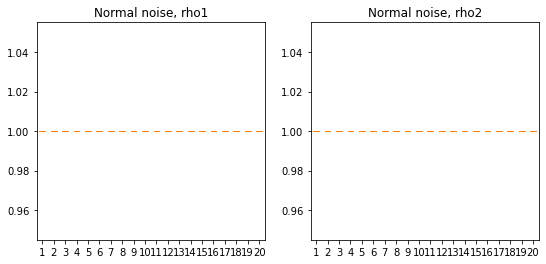

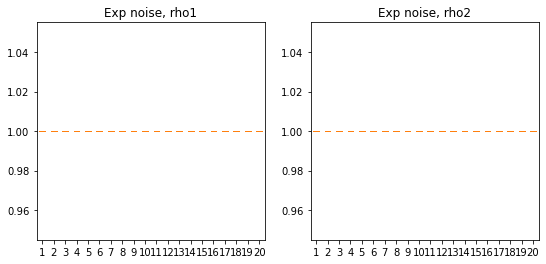

In [57]:
p = 400


def generate_dataset(beta_star, n, noise):
    X = np.random.uniform(0, 1, (p, n))

    if noise == 'normal':
        eps = np.random.uniform(0, 1, n)

    else:  # noise == 'exp'
        eps = np.random.laplace(0, 1, n)

    Y = np.dot(np.transpose(X), beta_star) + eps
    return X, Y


def rho1(t):
    return np.abs(t)


def rho2(t):
    return t*t/2


nb_kappa = 5
nb_simu = 20
n_tab = np.linspace(1, p-1, nb_kappa, dtype='int')
kappa_tab = np.zeros(nb_kappa)
beta_star = np.random.normal(0, 1, p)
noise1 = 'normal'
noise2 = 'exp'
error_tab_rho1_noise1 = np.zeros((nb_kappa, nb_simu))
error_tab_rho2_noise1 = np.zeros((nb_kappa, nb_simu))
error_tab_rho1_noise2 = np.zeros((nb_kappa, nb_simu))
error_tab_rho2_noise2 = np.zeros((nb_kappa, nb_simu))

for i in range(nb_kappa):
    n = n_tab[i]
    kappa_tab[i] = p/n
    for j in range(nb_simu):
        dataset1 = generate_dataset(beta_star, n, noise1)
        dataset2 = generate_dataset(beta_star, n, noise2)
        error_tab_rho1_noise1[i, j] = 1#MLE(dataset1, rho1)  #mettre fonction MLE question precedente
        error_tab_rho2_noise1[i, j] = 1#MLE(dataset1, rho2)
        error_tab_rho1_noise2[i, j] = 1#MLE(dataset2, rho1)
        error_tab_rho2_noise2[i, j] = 1#MLE(dataset2, rho2)

fig1, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
fig2, (ax21, ax22) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot11 = ax11.boxplot(error_tab_rho1_noise1)
ax11.set_title('Normal noise, rho1')

bplot12 = ax12.boxplot(error_tab_rho2_noise1)
ax12.set_title('Normal noise, rho2')

bplot21 = ax21.boxplot(error_tab_rho1_noise2)
ax21.set_title('Exp noise, rho1')

bplot22 = ax22.boxplot(error_tab_rho2_noise2)
ax22.set_title('Exp noise, rho2')

plt.show()

##**PART 2 Q4**

In [4]:
def prox_quad(x,c):
    return x/(1+c)
def prox_quad_prime(x,c):
    return 1/(1+c)
def prox_abs(x,c):
    return np.sign(x)*(np.max((0,np.abs(x)-c)))
def prox_abs_prime(x,c):
    if (x>c) | (-x>c):
        return 1
    return 0
def F_r(t,r):
    if r != 0:
        return stats.norm.cdf(t/r)+np.exp(r**2/2)/2*(np.exp(t)*stats.norm.cdf(-(t+r**2)/r)-np.exp(-t)*stats.norm.cdf((t-r**2)/r))
    else:
        return stats.laplace.cdf(t)
def F_r_bar(t,r):
    return 1-F_r(t,r)
def F_kappa(t,r,kappa):
    return F_r_bar(t,r)-(1-kappa)/2


def F_r_final(r,kappa):
    a_inf=-100
    b_max=100
    f=lambda x: F_kappa(x,r,kappa)
    T=scipy.optimize.bisect(f,0,100)
    fun = lambda x: x * F_r_bar(x,r)
    if T>0:
        return kappa*r**2-4*integrate.quad(fun,0,T)[0]
    else:
        return kappa*r**2
    

def bisection_r(kappa, stepmax=100, tol=1e-5):
    
    fun=lambda x:  F_r_final(x,kappa)
    return scipy.optimize.bisect(fun,0,10)


In [5]:
#Plot and calculate kappa and r, takes a few minutes
Kappa=np.linspace(0.01,0.95,num=100)
r_real=[bisection_r(k) for k in Kappa]
plt.plot(Kappa,r_real)

In [3]:
#result of r and kappa
r_real=[0.10846345012737402,
 0.1565523657097856,
 0.19596628679096284,
 0.23092602796054962,
 0.26309751733492703,
 0.2933422121930107,
 0.32217456112107357,
 0.3499312786277642,
 0.3768473753723356,
 0.4030949368950587,
 0.42880478420897816,
 0.45407943173700005,
 0.4790012679393385,
 0.5036379493765253,
 0.5280460875621884,
 0.5522738465163002,
 0.576362820944496,
 0.6003494252502151,
 0.6242659415204344,
 0.6481413243102452,
 0.6720018287762741,
 0.6958715081702849,
 0.7197726134370441,
 0.7437259182017897,
 0.7677509866368837,
 0.7918663967359407,
 0.8160899287588563,
 0.8404387262282853,
 0.8649294351073422,
 0.8895783256195955,
 0.9144014002674794,
 0.9394144908503677,
 0.9646333467719614,
 0.990073716571942,
 1.0157514241416266,
 1.0416824411106518,
 1.067882956391486,
 1.0943694439981755,
 1.121158729996523,
 1.14826805939515,
 1.1757151637573315,
 1.20351833029531,
 1.2316964731019198,
 1.2602692073062371,
 1.2892569268421994,
 1.3186808866191768,
 1.3485632898630229,
 1.3789273815689285,
 1.4097975489391956,
 1.4411994298677655,
 1.4731600306129167,
 1.5057078539814484,
 1.5388730393681271,
 1.572687516439828,
 1.6071851741310184,
 1.642402047222049,
 1.6783765228944958,
 1.7151495699738462,
 1.7527649942792323,
 1.7912697236499753,
 1.8307141271873206,
 1.8711523737840707,
 1.9126428358970315,
 1.955248545835957,
 1.9990377127794545,
 2.0440843106746343,
 2.090468748777994,
 2.138278639300779,
 2.1876096792345834,
 2.23856666718234,
 2.291264680674203,
 2.345830444666035,
 2.402403929626189,
 2.4611402260472914,
 2.5222117541886746,
 2.5858108824934334,
 2.652153047450838,
 2.7214804929110414,
 2.794066780012372,
 2.870222263376263,
 2.95030078873765,
 3.0347079484215556,
 3.1239113429194276,
 3.2184534525265462,
 3.31896794347017,
 3.4262005490711545,
 3.541036127527377,
 3.664534182520356,
 3.797976169297499,
 3.9429295128513786,
 4.10133580696197,
 4.275634803651656,
 4.468942754489262,
 4.685315749703705,
 4.930150559339381,
 5.210816885279428,
 5.53769774010334,
 5.9259913801736275,
 6.399036377177936,
 6.994962265558797]

Kappa=np.array([0.01      , 0.01949495, 0.0289899 , 0.03848485, 0.0479798 ,
       0.05747475, 0.0669697 , 0.07646465, 0.0859596 , 0.09545455,
       0.10494949, 0.11444444, 0.12393939, 0.13343434, 0.14292929,
       0.15242424, 0.16191919, 0.17141414, 0.18090909, 0.19040404,
       0.19989899, 0.20939394, 0.21888889, 0.22838384, 0.23787879,
       0.24737374, 0.25686869, 0.26636364, 0.27585859, 0.28535354,
       0.29484848, 0.30434343, 0.31383838, 0.32333333, 0.33282828,
       0.34232323, 0.35181818, 0.36131313, 0.37080808, 0.38030303,
       0.38979798, 0.39929293, 0.40878788, 0.41828283, 0.42777778,
       0.43727273, 0.44676768, 0.45626263, 0.46575758, 0.47525253,
       0.48474747, 0.49424242, 0.50373737, 0.51323232, 0.52272727,
       0.53222222, 0.54171717, 0.55121212, 0.56070707, 0.57020202,
       0.57969697, 0.58919192, 0.59868687, 0.60818182, 0.61767677,
       0.62717172, 0.63666667, 0.64616162, 0.65565657, 0.66515152,
       0.67464646, 0.68414141, 0.69363636, 0.70313131, 0.71262626,
       0.72212121, 0.73161616, 0.74111111, 0.75060606, 0.76010101,
       0.76959596, 0.77909091, 0.78858586, 0.79808081, 0.80757576,
       0.81707071, 0.82656566, 0.83606061, 0.84555556, 0.85505051,
       0.86454545, 0.8740404 , 0.88353535, 0.8930303 , 0.90252525,
       0.9120202 , 0.92151515, 0.9310101 , 0.94050505, 0.95      ])

##**PART 2 Q5**

In [52]:
def f1(z,c):
    return (z-prox_abs(z,c))**2
def f2(z,c):
    return prox_abs_prime(z,c)
def monte_carlo_expectancy(r,c, Nsim = 1e5):
    eps1 = np.random.laplace(size=(int(Nsim),)) #laplace()
    eps2 = np.random.normal(0,1, size = (int(Nsim),)) #gaussian(0,1)
    z = eps1+r*eps2 #zepsilon variable
    E1 = np.array(list(map(functools.partial(f1,c=c), z)))
    E2 = np.array(list(map(functools.partial(f2,c=c), z)))

    return np.sum(E1)/Nsim,np.sum(E2)/Nsim
def F(r, c):
    E1, E2 = monte_carlo_expectancy(r,c)
    return sqrt(E1/(1-E2))
def solve_iteration(c, err=1e-2) :
    r1 = 0.1
    r2 = 1
    stop = 100
    iter = 0
    while (abs(r1-r2)>1e-2 and iter<stop): 
        r1 = r2
        r2 = F(r1,c)
        iter +=1
        #print(abs(r1-r2)," ")
    if iter>=stop : 
        print("stop iter = 100")
    return r2
def kappa_quad(r):
    return 1-(1/(1+c))

def kappa_abs(r,c, Nsim= 1e5):
    eps1 = np.random.laplace(size=(int(Nsim),)) #laplace()
    eps2 = np.random.normal(0,1, size = (int(Nsim),)) #gaussian(0,1)
    z = eps1+r*eps2 #zepsilon variable
    E2 = np.array(list(map(functools.partial(f2,c=c), z)))
    return 1-np.sum(E2)/Nsim

In [53]:
#calculate r and kappa
c_values = np.linspace(0.01,7, 50) #10) cest bcp environ 10min pour tourner 
r_values = np.zeros(50)
kappa_values = np.zeros(50)
for i in range(50):
    r_values[i]=solve_iteration(c_values[i])
    kappa_values[i]=kappa_abs(r_values[i], c_values[i])
    print(i,": ",c_values[i]," ",kappa_values[i]," ",r_values[i],"\n")

In [4]:
#result of r and kappa
kappa_values=np.array([0.01   , 0.11104, 0.18622, 0.24942, 0.30286, 0.35323, 0.39271,
       0.43261, 0.4643 , 0.49435, 0.51966, 0.54668, 0.5703 , 0.58586,
       0.60745, 0.62521, 0.6403 , 0.65865, 0.67321, 0.68431, 0.69639,
       0.70955, 0.71974, 0.73224, 0.74448, 0.75216, 0.76247, 0.77048,
       0.77827, 0.78565, 0.79139, 0.80253, 0.80875, 0.81311, 0.81624,
       0.822  , 0.82724, 0.83337, 0.83985, 0.84333, 0.84621, 0.85005,
       0.8554 , 0.86404, 0.86213, 0.86157, 0.87199, 0.87247, 0.885  ,
       0.87949])
r_values=np.array([0.10195004, 0.44182507, 0.63824215, 0.80220262, 0.94091302,
       1.06461395, 1.18082226, 1.28677747, 1.38335284, 1.49220451,
       1.58693681, 1.67921312, 1.76744258, 1.86893003, 1.94974118,
       2.02934337, 2.11796999, 2.1900007 , 2.26073582, 2.35540806,
       2.42595035, 2.49024345, 2.5735606 , 2.64299796, 2.69125253,
       2.78457245, 2.82982615, 2.90764764, 2.97409798, 3.03807127,
       3.1052999 , 3.16259143, 3.24281855, 3.31443856, 3.35877375,
       3.44909236, 3.50931613, 3.57129255, 3.60000337, 3.68798878,
       3.75272039, 3.81741074, 3.87193423, 3.89688512, 4.01122153,
       4.10049191, 4.08989175, 4.18377153, 4.12921673, 4.30209506])

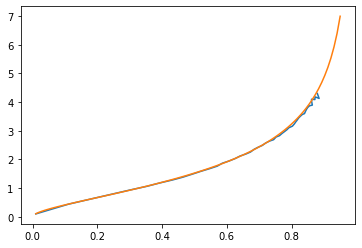

In [5]:
#plot monte calo and analytic
plt.plot(kappa_values, r_values,Kappa,r_real)